In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
google_ads_o = pd.read_csv('Google Ads Data.csv')
listing_site_o = pd.read_csv('Listing Site Data.csv')
google_ads = google_ads_o.copy()
listing_site = listing_site_o.copy()

In [4]:
google_ads.head(2)

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,03-Feb-21,USA
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaN,USA


In [5]:
listing_site.head(2)

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date
0,Omnify,Coaching,20-Oct-20,13.0,1.0,NaN,2.0,Capterra,UNITED STATES,NaN,NaN,NaN
1,Omnify,Dance Studio,20-Oct-20,20.0,1.0,NaN,2.0,Capterra,UNITED KINGDOM,NaN,NaN,NaN


In [6]:
google_ads.columns

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country'],
      dtype='object')

In [7]:
listing_site.columns

Index(['Product Name', 'Categories', 'Date of Report', 'Average Position',
       'Clicks', 'Leads', 'Money Spent ($)', 'Channel', 'Location',
       'Prospects', 'Paid', 'Paid Date'],
      dtype='object')

## Preprocess

In [8]:
google_ads.nunique()

Week               15
Campaign           15
Ad group           27
Keyword type        3
Search Keyword     21
Currency            1
Clicks             13
Impressions        59
Cost ($)          155
Leads               2
Prospects           4
Payment ($)         4
Payment Date        8
Country             1
dtype: int64

In [9]:
listing_site.nunique()

Product Name          1
Categories           19
Date of Report      193
Average Position    135
Clicks               21
Leads                 5
Money Spent ($)     159
Channel               3
Location             14
Prospects             2
Paid                 11
Paid Date            13
dtype: int64

In [10]:
google_ads['Week'].unique()

array(['25-Jan-21', '01-Feb-21', '08-Feb-21', '15-Feb-21', '22-Feb-21',
       '01-Mar-21', '08-Mar-21', '15-Mar-21', '22-Mar-21', '29-Mar-21',
       '05-Apr-21', '12-Apr-21', '19-Apr-21', '26-Apr-21', '03-May-21'],
      dtype=object)

In [11]:
google_ads['Week'].value_counts(sort=False)

25-Jan-21    27
01-Feb-21    30
08-Feb-21    25
15-Feb-21    33
22-Feb-21    33
01-Mar-21    27
08-Mar-21    29
15-Mar-21    31
22-Mar-21    34
29-Mar-21    23
05-Apr-21    22
12-Apr-21    20
19-Apr-21    26
26-Apr-21    29
03-May-21    29
Name: Week, dtype: int64

In [12]:
google_ads['Search Keyword'].unique()

array(['pool reservation system', 'pool booking app',
       'yoga studio booking software', 'pool scheduling software',
       'pool reservation software', 'reservation management system',
       'booking management software', 'swimming pool reservation system',
       'swimming pool booking system', 'yoga studio management software',
       'pilates studio management software',
       'yoga studio scheduling software', '=+pool +reservation software',
       '#NAME?', 'yoga studio software', 'pilates booking system',
       'pilates studio software', 'pilates management software',
       'pilates studio booking software', 'yoga studio app',
       'pilates studio software manager'], dtype=object)

In [13]:
google_ads['Keyword type'].unique()

array(['Exact', 'Broad', 'Phrase'], dtype=object)

In [14]:
listing_site['Channel'].unique()

array(['Capterra', 'GetApp', 'Software Advice'], dtype=object)

In [15]:
listing_site['Categories'].unique()

array(['Coaching', 'Dance Studio', 'Personal Trainer', 'Scheduling',
       'Class Registration', 'Fitness', 'Swim School', 'Yoga Studio',
       'Camp Management', 'Music School', 'Reservations',
       'Club Management', 'Gymnastics', 'Venue Management',
       'Membership Management', 'Parks and Recreation', 'Spa',
       'Martial Arts', 'Pilates Studio'], dtype=object)

In [16]:
google_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Week            418 non-null    object 
 1   Campaign        418 non-null    object 
 2   Ad group        418 non-null    object 
 3   Keyword type    418 non-null    object 
 4   Search Keyword  418 non-null    object 
 5   Currency        418 non-null    object 
 6   Clicks          418 non-null    int64  
 7   Impressions     418 non-null    int64  
 8   Cost ($)        418 non-null    float64
 9   Leads           418 non-null    int64  
 10  Prospects       418 non-null    int64  
 11  Payment ($)     8 non-null      object 
 12  Payment Date    8 non-null      object 
 13  Country         418 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 45.8+ KB


In [17]:
listing_site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      2091 non-null   object 
 1   Categories        2091 non-null   object 
 2   Date of Report    2091 non-null   object 
 3   Average Position  2090 non-null   float64
 4   Clicks            2090 non-null   float64
 5   Leads             163 non-null    float64
 6   Money Spent ($)   2089 non-null   float64
 7   Channel           2091 non-null   object 
 8   Location          2091 non-null   object 
 9   Prospects         66 non-null     float64
 10  Paid              14 non-null     object 
 11  Paid Date         13 non-null     object 
dtypes: float64(5), object(7)
memory usage: 196.2+ KB


### Google Ads

In [18]:
sum(google_ads['Cost ($)'])

2788.6800000000007

In [19]:
google_ads['Payment ($)'].unique()

array(['$980', nan, '$1,188', '$1,788', '$2,388'], dtype=object)

In [20]:
google_ads['Payment ($)'] = google_ads['Payment ($)'].replace('[\$,]', '', regex=True).astype(float)

In [21]:
google_ads['Payment ($)'].unique()

array([ 980.,   nan, 1188., 1788., 2388.])

In [22]:
google_ads['Payment ($)'].fillna(0 , inplace = True)

In [23]:
google_ads['Payment ($)'].unique()

array([ 980.,    0., 1188., 1788., 2388.])

In [24]:
sum(google_ads['Payment ($)'])

11880.0

In [25]:
google_ads['Week'] = pd.to_datetime(google_ads['Week'])

In [26]:
google_ads['Payment Date'] = pd.to_datetime(google_ads['Payment Date'])

In [27]:
google_ads.to_csv('google_ads_cleaned.csv',index = False)

### Listing Site

In [28]:
listing_site['Money Spent ($)'].fillna(0,inplace=True)

In [29]:
sum(listing_site['Money Spent ($)'])

25223.25000000001

In [30]:
listing_site['Paid'] = listing_site['Paid'].replace('[\$,]', '', regex=True).astype(float)

In [31]:
listing_site['Paid'].fillna(0,inplace=True)

In [32]:
sum(listing_site['Paid'])

23460.0

In [33]:
listing_site['Date of Report'] = pd.to_datetime(listing_site['Date of Report'])
listing_site['Date of Report'].head(1)

0   2020-10-20
Name: Date of Report, dtype: datetime64[ns]

In [34]:
listing_site['Paid Date'] = pd.to_datetime(listing_site['Paid Date'])

In [35]:
listing_site['Week'] = listing_site['Date of Report']

In [36]:
# listing_site.head(1)

In [37]:

def first_day_of_week(date):
    
    date = date.strftime("%Y-%m-%d")
    year, month, day = map(int, date.split('-'))
    given_date = datetime(year, month, day)

    days_since_monday = (given_date.weekday()) % 7

    first_day_of_week = given_date - timedelta(days=days_since_monday)

    return first_day_of_week

In [38]:
for i in range(len(listing_site)):
    listing_site['Week'][i] = first_day_of_week(listing_site['Week'][i])

In [39]:
listing_site['Week'].value_counts(sort = False)

2020-10-19     39
2020-10-26     84
2020-11-02     73
2020-11-09     85
2020-11-16    100
2020-11-23     48
2020-11-30     68
2020-12-07     96
2020-12-14     79
2020-12-21     79
2020-12-28     91
2021-01-04     78
2021-01-11     90
2021-01-18     80
2021-01-25     61
2021-02-01     95
2021-02-08     84
2021-02-15     78
2021-02-22     69
2021-03-01     71
2021-03-08     73
2021-03-15     72
2021-03-22     68
2021-03-29     59
2021-04-05     78
2021-04-12     81
2021-04-19     73
2021-04-26     39
Name: Week, dtype: int64

In [40]:
listing_site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product Name      2091 non-null   object        
 1   Categories        2091 non-null   object        
 2   Date of Report    2091 non-null   datetime64[ns]
 3   Average Position  2090 non-null   float64       
 4   Clicks            2090 non-null   float64       
 5   Leads             163 non-null    float64       
 6   Money Spent ($)   2091 non-null   float64       
 7   Channel           2091 non-null   object        
 8   Location          2091 non-null   object        
 9   Prospects         66 non-null     float64       
 10  Paid              2091 non-null   float64       
 11  Paid Date         13 non-null     datetime64[ns]
 12  Week              2091 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(6), object(4)
memory usage: 212.5+ KB


In [41]:
listing_site.fillna(0,inplace =True)

In [42]:
sum(listing_site['Clicks'])

3477.0

In [43]:
listing_site['Average Position']

0       13.00
1       20.00
2        6.00
3       59.00
4        6.00
        ...  
2086    10.00
2087     1.00
2088    14.67
2089     8.00
2090     8.00
Name: Average Position, Length: 2091, dtype: float64

In [44]:
listing_site.to_csv('listing_site_cleaned.csv',index = False)

## Most Profitable channel

In [45]:
listing_site.head()

,Product Name,Categories,Date of Report,Average Position,Clicks,Leads,Money Spent ($),Channel,Location,Prospects,Paid,Paid Date,Week
0,Omnify,Coaching,2020-10-20,13.0,1.0,0.0,2.0,Capterra,UNITED STATES,0.0,0.0,0,2020-10-19
1,Omnify,Dance Studio,2020-10-20,20.0,1.0,0.0,2.0,Capterra,UNITED KINGDOM,0.0,0.0,0,2020-10-19
2,Omnify,Personal Trainer,2020-10-20,6.0,1.0,0.0,2.0,Capterra,SINGAPORE,0.0,0.0,0,2020-10-19
3,Omnify,Scheduling,2020-10-20,59.0,1.0,0.0,2.0,GetApp,UNITED STATES,0.0,0.0,0,2020-10-19
4,Omnify,Class Registration,2020-10-21,6.0,1.0,0.0,2.0,Capterra,AUSTRALIA,0.0,0.0,0,2020-10-19


In [46]:
finance_channel = listing_site[['Channel','Money Spent ($)','Paid']]

In [47]:
finance_channel['Profit'] = finance_channel['Paid']-finance_channel['Money Spent ($)']

In [48]:
finance_channel.head()

,Channel,Money Spent ($),Paid,Profit
0,Capterra,2.0,0.0,-2.0
1,Capterra,2.0,0.0,-2.0
2,Capterra,2.0,0.0,-2.0
3,GetApp,2.0,0.0,-2.0
4,Capterra,2.0,0.0,-2.0


In [49]:
finance_channel['Channel'].unique()

array(['Capterra', 'GetApp', 'Software Advice'], dtype=object)

In [50]:
finance_channel['Channel'].value_counts()

Capterra           1211
GetApp              825
Software Advice      55
Name: Channel, dtype: int64

In [51]:
sum(finance_channel[finance_channel['Channel']=='Capterra']['Profit'])

416.15000000000146

In [52]:
sum(finance_channel[finance_channel['Channel']=='GetApp']['Profit'])

-3661.900000000002

In [53]:
sum(finance_channel[finance_channel['Channel']=='Software Advice']['Profit'])

1482.5

#### "Software Advice" Channel is the most Profitable Channel

## Which category/keyword is the most profitable

### Google Ads

In [54]:
finance_keyword = google_ads[['Keyword type','Cost ($)','Payment ($)']]

In [55]:
finance_keyword['Profit']=finance_keyword['Payment ($)']-finance_keyword['Cost ($)']

In [56]:
finance_keyword.head()

,Keyword type,Cost ($),Payment ($),Profit
0,Exact,38.33,980.0,941.67
1,Exact,11.70,0.0,-11.70
2,Broad,45.13,1188.0,1142.87
3,Phrase,23.91,0.0,-23.91
4,Broad,4.89,0.0,-4.89


In [57]:
finance_keyword['Keyword type'].unique()

array(['Exact', 'Broad', 'Phrase'], dtype=object)

In [58]:
sum(finance_keyword[finance_keyword['Keyword type']=='Exact']['Profit'])

2187.67

In [59]:
sum(finance_keyword[finance_keyword['Keyword type']=='Broad']['Profit'])

4271.199999999999

In [60]:
sum(finance_keyword[finance_keyword['Keyword type']=='Phrase']['Profit'])

2632.4500000000003

#### For Google Ads "Broad" keywors is the most profitable

### Listing Site

In [61]:
finance_category = listing_site[['Categories','Money Spent ($)','Paid']]

In [62]:
finance_category['Profit'] = finance_category['Paid']-finance_category['Money Spent ($)']

In [63]:
finance_category.head()

,Categories,Money Spent ($),Paid,Profit
0,Coaching,2.0,0.0,-2.0
1,Dance Studio,2.0,0.0,-2.0
2,Personal Trainer,2.0,0.0,-2.0
3,Scheduling,2.0,0.0,-2.0
4,Class Registration,2.0,0.0,-2.0


In [64]:
finance_category['Categories'].unique()

array(['Coaching', 'Dance Studio', 'Personal Trainer', 'Scheduling',
       'Class Registration', 'Fitness', 'Swim School', 'Yoga Studio',
       'Camp Management', 'Music School', 'Reservations',
       'Club Management', 'Gymnastics', 'Venue Management',
       'Membership Management', 'Parks and Recreation', 'Spa',
       'Martial Arts', 'Pilates Studio'], dtype=object)

In [65]:
finance_category_group = finance_category.groupby('Categories')['Profit'].sum().reset_index()

In [66]:
finance_category_group

,Categories,Profit
0,Camp Management,-48.00
1,Class Registration,1392.50
2,Club Management,-245.50
3,Coaching,-1003.25
4,Dance Studio,-202.25
5,Fitness,-50.50
6,Gymnastics,-6.00
7,Martial Arts,-2.00
8,Membership Management,-2485.85
9,Music School,-42.00


In [67]:
finance_category_group[finance_category_group['Profit']==max(finance_category_group['Profit'])]

,Categories,Profit
10,Parks and Recreation,3581.35


#### For Listing Site "Parks and Recreation" category is the most profitable.

## Analyzing data points on time series graphs

### Google Ads

In [68]:
google_ads.head(1)

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA


In [69]:
# Convert week column to datetime format
google_ads['Week'] = pd.to_datetime(google_ads['Week'])
google_ads['Week'] = google_ads['Week'].dt.strftime('%j').astype(int)

In [70]:
# setting week colun as index for time series analysis
# google_ads.set_index('Week', inplace=True)

In [71]:
google_ads.head(1)

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA


#### Time series plot

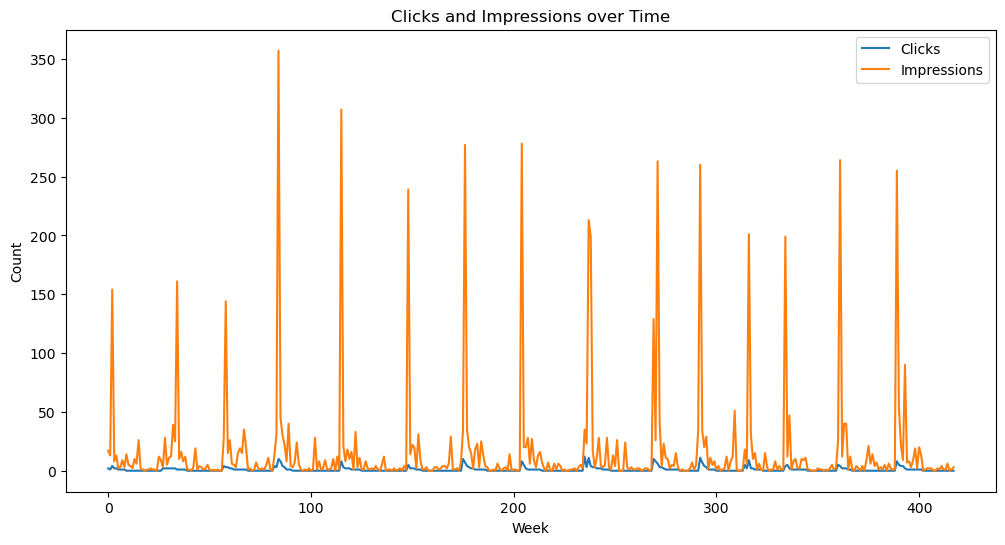

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(google_ads['Clicks'], label='Clicks')
plt.plot(google_ads['Impressions'], label='Impressions')
plt.xlabel('Week')  # x-axis label as 'Week'
plt.ylabel('Count')
plt.title('Clicks and Impressions over Time')
plt.legend()

plt.show()


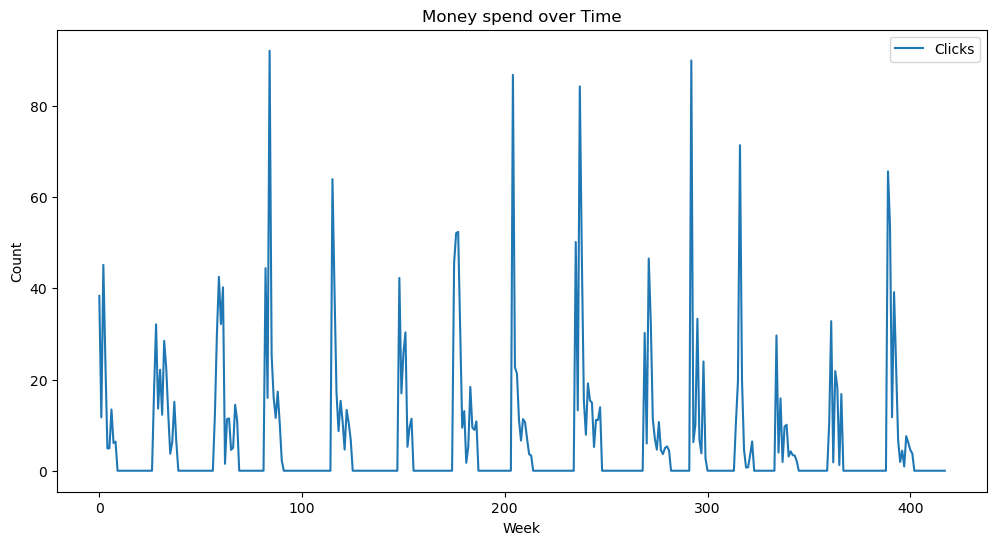

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(google_ads['Cost ($)'], label='Clicks')
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Money spend over Time')
plt.legend()

plt.show()

In [74]:
listing_site['Date of Report'] = pd.to_datetime(listing_site['Date of Report'])

In [75]:
listing_site.set_index('Date of Report', inplace=True)

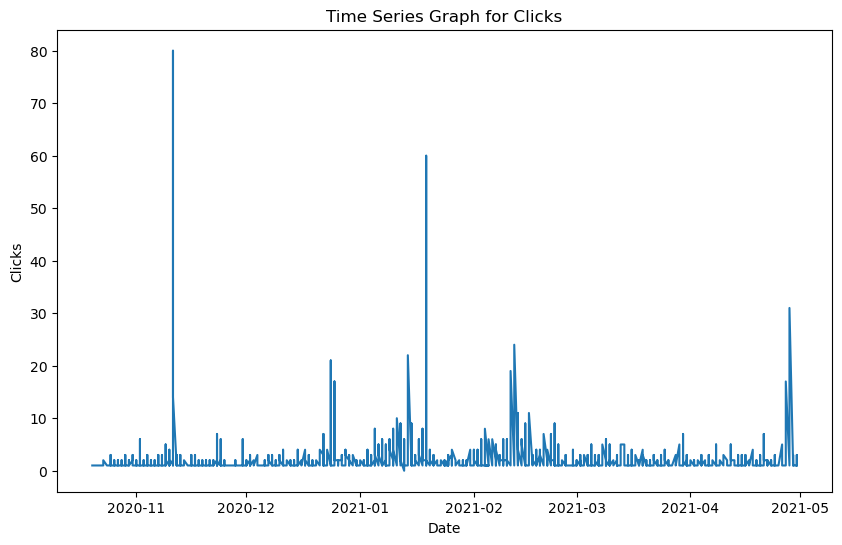

In [76]:
# Plotting the time series graph for 'Clicks'
plt.figure(figsize=(10, 6))
plt.plot(listing_site['Clicks'])
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.title('Time Series Graph for Clicks')
plt.show()

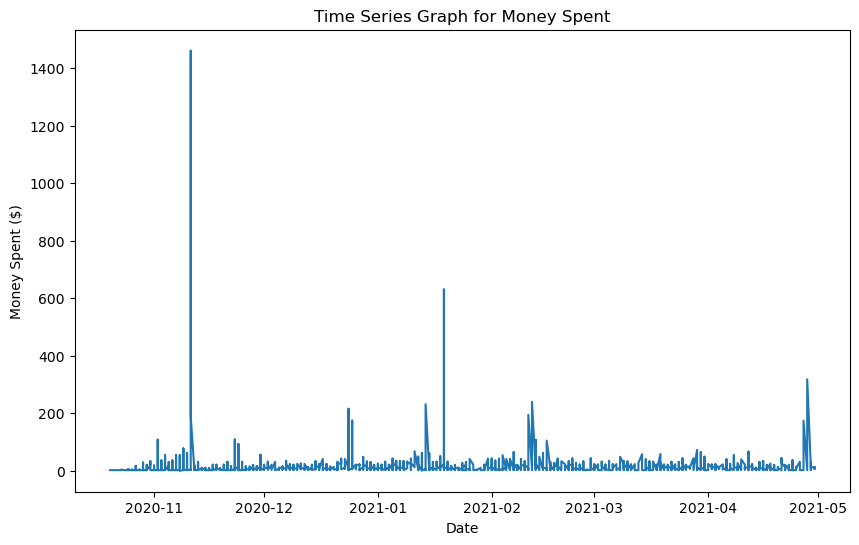

In [77]:
# Plotting the time series graph for 'Money Spent ($)'
plt.figure(figsize=(10, 6))
plt.plot(listing_site['Money Spent ($)'])
plt.xlabel('Date')
plt.ylabel('Money Spent ($)')
plt.title('Time Series Graph for Money Spent')
plt.show()

## Analyse the Impact of geography

In [78]:
listing_site_geo = listing_site_o[['Date of Report','Categories','Clicks','Money Spent ($)','Channel','Location','Paid']]

In [79]:
listing_site_geo['Paid'] = listing_site_geo['Paid'].replace('[\$,]', '', regex=True).astype(float)

In [80]:
listing_site_geo['Paid'].fillna(0,inplace = True)

In [81]:
listing_site_geo.head(2)

,Date of Report,Categories,Clicks,Money Spent ($),Channel,Location,Paid
0,20-Oct-20,Coaching,1.0,2.0,Capterra,UNITED STATES,0.0
1,20-Oct-20,Dance Studio,1.0,2.0,Capterra,UNITED KINGDOM,0.0


In [82]:
location_counts = listing_site_geo['Location'].value_counts().reset_index()
location_counts.columns = ['Location','Counts']
location_counts

,Location,Counts
0,UNITED STATES,902
1,UNITED KINGDOM,389
2,SINGAPORE,244
3,AUSTRALIA,213
4,CANADA,197
5,United States,73
6,United Kingdom,26
7,Canada,14
8,Singapore,12
9,Australia,12


In [83]:
listing_site_geo['Location'] = listing_site_geo['Location'].str.upper()

In [84]:
location_counts = listing_site_geo['Location'].value_counts().reset_index()
location_counts.columns = ['Location','Counts']
location_counts

,Location,Counts
0,UNITED STATES,975
1,UNITED KINGDOM,415
2,SINGAPORE,256
3,AUSTRALIA,225
4,CANADA,211
5,USA,6
6,MIDDLE EAST,1
7,UK,1
8,US,1


In [85]:
map = {
    'UK': 'UNITED KINGDOM',
    'US': 'UNITED STATES',
    'USA': 'UNITED STATES'
}

In [86]:
listing_site_geo['Location'] = listing_site_geo['Location'].replace(map)

In [87]:
location_counts = listing_site_geo['Location'].value_counts().reset_index()
location_counts.columns = ['Location','Counts']
location_counts

,Location,Counts
0,UNITED STATES,982
1,UNITED KINGDOM,416
2,SINGAPORE,256
3,AUSTRALIA,225
4,CANADA,211
5,MIDDLE EAST,1


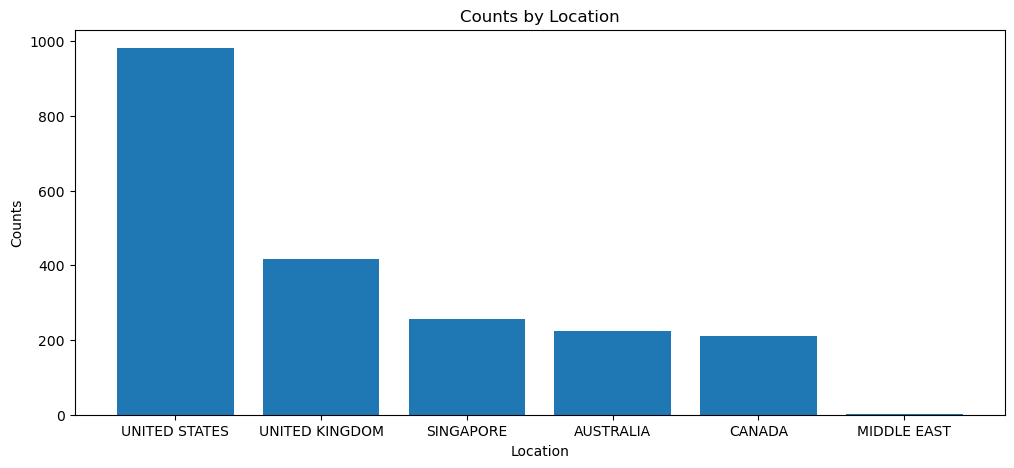

In [88]:
plt.figure(figsize = (12,5))
plt.bar(location_counts['Location'] ,location_counts['Counts'])
plt.xlabel('Location')
plt.ylabel('Counts')
plt.title('Counts by Location')
plt.show()

In [89]:
location_analysis = listing_site_geo.groupby('Location', as_index=False)['Clicks','Money Spent ($)','Paid'].sum()
location_analysis

,Location,Clicks,Money Spent ($),Paid
0,AUSTRALIA,279.0,1224.25,0.0
1,CANADA,251.0,1369.75,2768.0
2,MIDDLE EAST,1.0,0.00,0.0
3,SINGAPORE,471.0,2243.25,1788.0
4,UNITED KINGDOM,713.0,4361.85,4768.0
5,UNITED STATES,1762.0,16024.15,14136.0


In [90]:
location_analysis['Profit'] = location_analysis['Paid'] - location_analysis['Money Spent ($)']
location_analysis

,Location,Clicks,Money Spent ($),Paid,Profit
0,AUSTRALIA,279.0,1224.25,0.0,-1224.25
1,CANADA,251.0,1369.75,2768.0,1398.25
2,MIDDLE EAST,1.0,0.00,0.0,0.00
3,SINGAPORE,471.0,2243.25,1788.0,-455.25
4,UNITED KINGDOM,713.0,4361.85,4768.0,406.15
5,UNITED STATES,1762.0,16024.15,14136.0,-1888.15


In [91]:
location_analysis = location_analysis.merge(location_counts , on = 'Location')

In [92]:
location_analysis['Average Spent'] = location_analysis['Money Spent ($)'] / location_analysis['Counts']
location_analysis

,Location,Clicks,Money Spent ($),Paid,Profit,Counts,Average Spent
0,AUSTRALIA,279.0,1224.25,0.0,-1224.25,225,5.441111
1,CANADA,251.0,1369.75,2768.0,1398.25,211,6.491706
2,MIDDLE EAST,1.0,0.00,0.0,0.00,1,0.000000
3,SINGAPORE,471.0,2243.25,1788.0,-455.25,256,8.762695
4,UNITED KINGDOM,713.0,4361.85,4768.0,406.15,416,10.485216
5,UNITED STATES,1762.0,16024.15,14136.0,-1888.15,982,16.317872


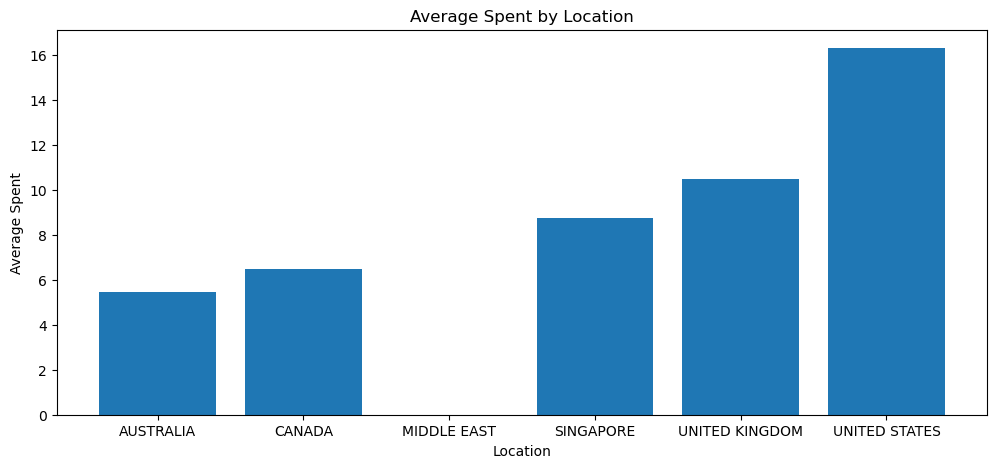

In [93]:
plt.figure(figsize = (12,5))
plt.bar(location_analysis['Location'] ,location_analysis['Average Spent'])
plt.xlabel('Location')
plt.ylabel('Average Spent')
plt.title('Average Spent by Location')
plt.show()

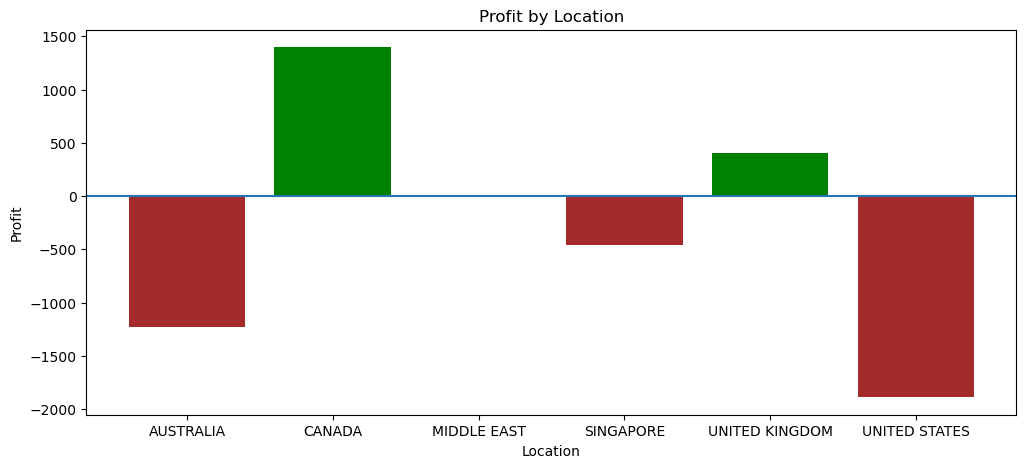

In [94]:
plt.figure(figsize = (12,5))
colors = ['green' if profit > 0 else 'brown' for profit in location_analysis['Profit']]
plt.bar(location_analysis['Location'] ,location_analysis['Profit'], color = colors)
plt.xlabel('Location')
plt.ylabel('Profit')
plt.axhline(0)
plt.title('Profit by Location')
plt.show()

In [95]:
canada = listing_site_geo[listing_site_geo['Location']=='CANADA']
canada.head(1)

,Date of Report,Categories,Clicks,Money Spent ($),Channel,Location,Paid
7,21-Oct-20,Personal Trainer,1.0,2.0,GetApp,CANADA,0.0


In [96]:
canada_categories = canada.groupby('Categories', as_index=False)['Clicks','Money Spent ($)','Paid'].sum()
canada_categories['Profit'] = canada_categories['Paid'] - canada_categories['Money Spent ($)']
canada_categories

,Categories,Clicks,Money Spent ($),Paid,Profit
0,Camp Management,5.0,10.00,0.0,-10.00
1,Class Registration,44.0,300.50,980.0,679.50
2,Coaching,30.0,101.25,0.0,-101.25
3,Dance Studio,9.0,25.75,0.0,-25.75
4,Fitness,19.0,158.00,0.0,-158.00
5,Membership Management,39.0,255.75,1788.0,1532.25
6,Parks and Recreation,21.0,69.00,0.0,-69.00
7,Personal Trainer,10.0,20.00,0.0,-20.00
8,Reservations,27.0,149.25,0.0,-149.25
9,Scheduling,32.0,247.00,0.0,-247.00


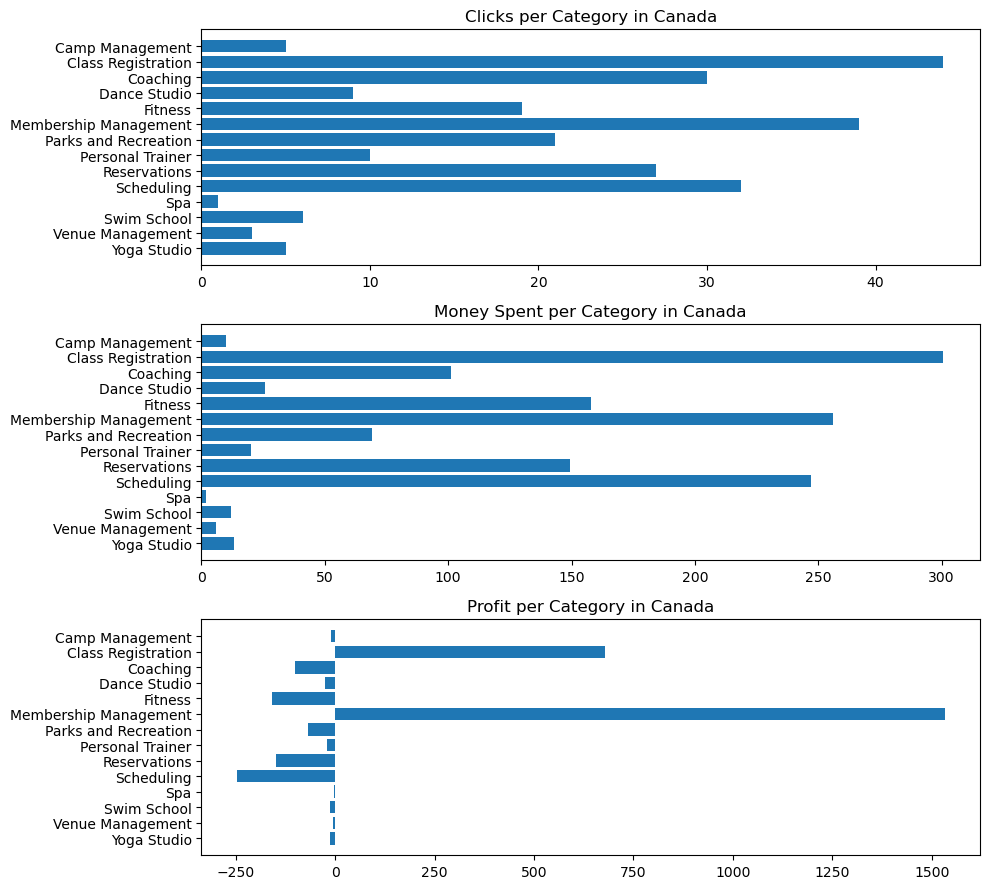

In [97]:
fig, ax = plt.subplots(3, 1, figsize=(10, 9))

ax[0].barh(canada_categories['Categories'],canada_categories['Clicks'])
ax[0].invert_yaxis()
ax[0].set_title('Clicks per Category in Canada')

ax[1].barh(canada_categories['Categories'],canada_categories['Money Spent ($)'])
ax[1].invert_yaxis()
ax[1].set_title('Money Spent per Category in Canada')

ax[2].barh(canada_categories['Categories'],canada_categories['Profit'])
ax[2].invert_yaxis()
# ax[2].axvline(0,color = 'black')
ax[2].set_title('Profit per Category in Canada')

plt.tight_layout()
plt.show()

In [98]:
usa = listing_site_geo[listing_site_geo['Location']=='UNITED STATES']

In [99]:
usa_categories = usa.groupby('Categories', as_index=False)['Clicks','Money Spent ($)','Paid'].sum()
usa_categories['Profit'] = usa_categories['Paid'] - usa_categories['Money Spent ($)']
usa_categories

,Categories,Clicks,Money Spent ($),Paid,Profit
0,Camp Management,15.0,30.00,0.0,-30.00
1,Class Registration,241.0,2353.00,3323.0,970.00
2,Club Management,7.0,40.75,0.0,-40.75
3,Coaching,186.0,701.75,0.0,-701.75
4,Dance Studio,14.0,99.50,0.0,-99.50
5,Fitness,80.0,723.00,1188.0,465.00
6,Gymnastics,3.0,6.00,0.0,-6.00
7,Martial Arts,1.0,2.00,0.0,-2.00
8,Membership Management,190.0,1925.00,0.0,-1925.00
9,Music School,9.0,36.00,0.0,-36.00


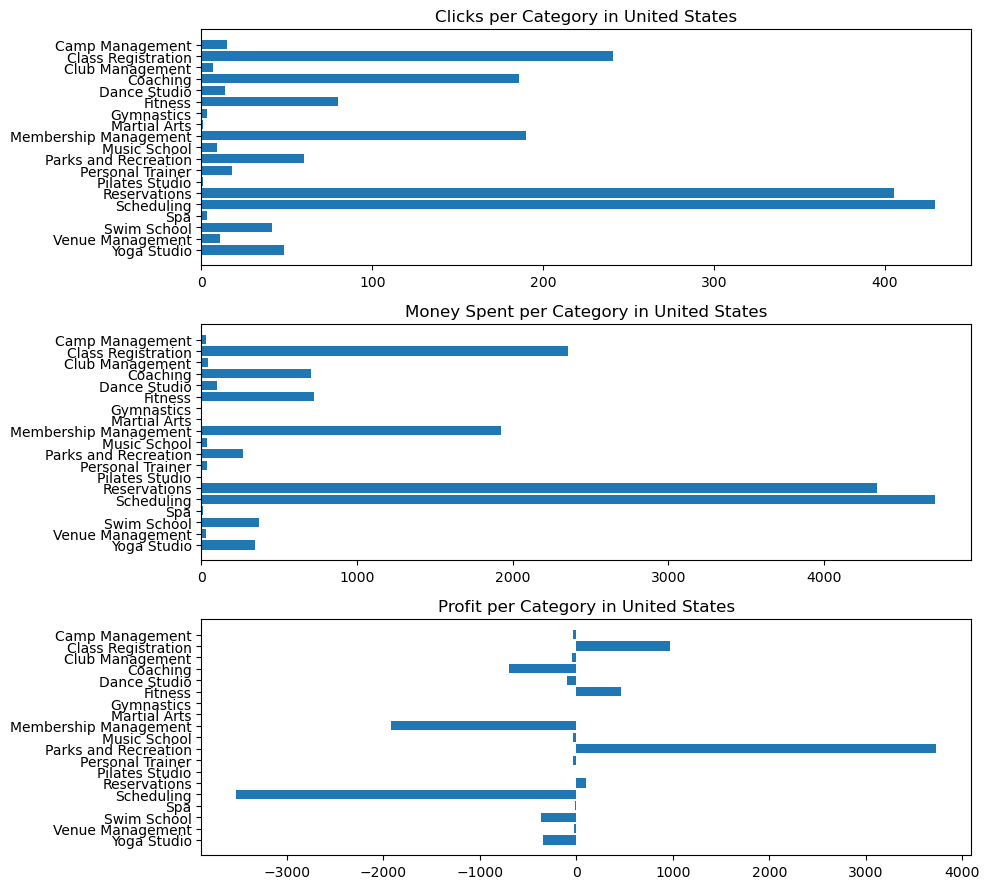

In [100]:
fig, ax = plt.subplots(3, 1, figsize=(10, 9))

ax[0].barh(usa_categories['Categories'],usa_categories['Clicks'])
ax[0].invert_yaxis()
ax[0].set_title('Clicks per Category in United States')

ax[1].barh(usa_categories['Categories'],usa_categories['Money Spent ($)'])
ax[1].invert_yaxis()
ax[1].set_title('Money Spent per Category in United States')

ax[2].barh(usa_categories['Categories'],usa_categories['Profit'])
ax[2].invert_yaxis()
ax[2].set_title('Profit per Category in United States')

plt.tight_layout()
plt.show()

In [101]:
location_analysis.to_csv('location_analysis.csv',index = False)